## Кластеризация: самостоятельное задание

Рассмотрим следующий датасет покупателей:

In [1]:
import pandas as pd 

df = pd.read_csv('http://www.soshnikov.com/temp/data/marketing_campaign.zip',sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [2]:
def M_Status(x):
    if x=='Married' or x=='Together': 
      return 1
    else:
      return 0

In [ ]:
df.Education.value_counts()


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
df.groupby('Education').mean()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Education,,,,,,,,,,,,,,,,,,,,,
2n Cycle,5588.211823,1972.024631,47633.190000,0.477833,0.408867,48.418719,198.182266,28.955665,141.256158,47.482759,...,5.453202,0.073892,0.049261,0.049261,0.068966,0.009852,0.019704,3.0,11.0,0.108374
Basic,5396.407407,1977.462963,20306.259259,0.629630,0.092593,48.444444,7.240741,11.111111,11.444444,17.055556,...,6.870370,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.037037
Graduation,5652.523514,1969.635315,52720.373656,0.444543,0.494232,50.035492,284.268855,30.774623,179.488909,43.149956,...,5.287489,0.069210,0.071872,0.076309,0.072760,0.014197,0.012422,3.0,11.0,0.134871
Master,5403.648649,1966.878378,52917.534247,0.454054,0.535135,47.586486,333.075676,21.654054,163.378378,32.100000,...,5.178378,0.064865,0.083784,0.075676,0.048649,0.005405,0.005405,3.0,11.0,0.154054
PhD,5619.096708,1966.043210,56145.313929,0.401235,0.598765,48.483539,404.495885,20.049383,168.602881,26.728395,...,5.259259,0.082305,0.092593,0.080247,0.061728,0.020576,0.002058,3.0,11.0,0.207819


In [3]:
Education_List = ['Basic','2n Cycle','Graduation','Master','PhD']

In [4]:
df.Marital_Status = df.Marital_Status.apply(M_Status)

In [5]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,0,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,0,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,1,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,1,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,1,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,1,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,1,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,0,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,1,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [14]:
import sklearn 
import sklearn.preprocessing

E =  (sklearn.preprocessing.OrdinalEncoder(categories=[Education_List]))
df.Education = E.fit_transform(df.Education.values.reshape(-1,1))

In [15]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2.0,0,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2.0,0,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2.0,1,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2.0,1,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4.0,1,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2.0,1,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4.0,1,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2.0,0,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3.0,1,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [23]:
s = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] = (s.max()-s).apply(lambda x:x.days)

In [24]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2.0,0,58138.0,0,0,971,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2.0,0,46344.0,1,1,125,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2.0,1,71613.0,0,0,472,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2.0,1,26646.0,1,0,65,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4.0,1,58293.0,1,0,321,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2.0,1,61223.0,0,1,541,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4.0,1,64014.0,2,1,61,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2.0,0,56981.0,0,0,315,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3.0,1,69245.0,0,1,316,8,428,...,3,0,0,0,0,0,0,3,11,0


In [26]:
df['Age'] = 2000-df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,2.0,0,58138.0,0,0,971,58,635,...,0,0,0,0,0,0,3,11,1,43
1,2174,1954,2.0,0,46344.0,1,1,125,38,11,...,0,0,0,0,0,0,3,11,0,46
2,4141,1965,2.0,1,71613.0,0,0,472,26,426,...,0,0,0,0,0,0,3,11,0,35
3,6182,1984,2.0,1,26646.0,1,0,65,26,11,...,0,0,0,0,0,0,3,11,0,16
4,5324,1981,4.0,1,58293.0,1,0,321,94,173,...,0,0,0,0,0,0,3,11,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2.0,1,61223.0,0,1,541,46,709,...,0,0,0,0,0,0,3,11,0,33
2236,4001,1946,4.0,1,64014.0,2,1,61,56,406,...,0,0,0,1,0,0,3,11,0,54
2237,7270,1981,2.0,0,56981.0,0,0,315,91,908,...,0,1,0,0,0,0,3,11,0,19
2238,8235,1956,3.0,1,69245.0,0,1,316,8,428,...,0,0,0,0,0,0,3,11,0,44


In [28]:
df.drop(columns=['Year_Birth','ID'],inplace=True)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,2.0,0,58138.0,0,0,971,58,635,88,546,...,0,0,0,0,0,0,3,11,1,43
1,2.0,0,46344.0,1,1,125,38,11,1,6,...,0,0,0,0,0,0,3,11,0,46
2,2.0,1,71613.0,0,0,472,26,426,49,127,...,0,0,0,0,0,0,3,11,0,35
3,2.0,1,26646.0,1,0,65,26,11,4,20,...,0,0,0,0,0,0,3,11,0,16
4,4.0,1,58293.0,1,0,321,94,173,43,118,...,0,0,0,0,0,0,3,11,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2.0,1,61223.0,0,1,541,46,709,43,182,...,0,0,0,0,0,0,3,11,0,33
2236,4.0,1,64014.0,2,1,61,56,406,0,30,...,0,0,0,1,0,0,3,11,0,54
2237,2.0,0,56981.0,0,0,315,91,908,48,217,...,0,1,0,0,0,0,3,11,0,19
2238,3.0,1,69245.0,0,1,316,8,428,30,214,...,0,0,0,0,0,0,3,11,0,44


Датасет содержит следующие поля:

* `ID`: уникальный идентификатор
* `Year_Birth`: год рождения
* `Education`: уровень образования
* `Marital_Status`: семейное положение
* `Income`: годовой доход семьи
* `Kidhome`: число детей в семье
* `Teenhome`: число подростков в семье
* `Dt_Customer`: дата начала обслуживания в компании
* `Recency`: число дней с последней покупки
* `Complain`: 1, если за последние 2 года от клиента были жалобы, иначе 0 
* `MntWines`: сколько потрачено на вина за последние 2 года
* `MntFruits`: сколько потрачено на фрукты за последние 2 года
* `MntMeatProducts`: сколько потрачено на мясо за последние 2 года
* `MntFishProducts`: сколько потрачено на рыбу за последние 2 года
* `MntSweetProducts`: сколько потрачено на сладкое за последние 2 года
* `MntGoldProds`: сколько потрачено на золото за последние 2 года
* `NumDealsPurchases`: число покупок, сделанных со скидкой
* `AcceptedCmp1` ... `AcceptedCmp5`: 1, если клиент принял участие в соответствующей рекламной кампании (от 1 до 5), иначе 0 
* `Response`: 1 если клиент принял предложение последней рекламной кампании, иначе 0
* `NumWebPurchases`: число покупок через веб-сайт
* `NumCatalogPurchases`: число покупок по каталогу
* `NumStorePurchases`: число покупок в магазине
* `NumWebVisitsMonth`: число заходов на веб-сайт за последний месяц

## Ваша цель:

Провести осмысленную кластеризацию клиентов и выделить основные группы. Визуально подтвердить, что имеет место некоторая кластеризация клиентов.

Что надо не забыть сделать:
* Предобработка данных, включая приведение полей к числовым
* Выбор оптимального количества кластеров
* Какие поля учитывать при кластеризации, и нужно ли вычислить дополнительные
* Как визуализировать кластеры

Также проверьте следующие гипотезы:
* Образованные клиенты меньше пьют
* Молодые предпочитают покупать онлайн
* Семьи с детьми покупают больше сладкого


In [32]:
purchase_fields = [ x for x in df.columns if x.startswith('Mnt') ]
df[['Education','Marital_Status','Kidhome','Teenhome']+purchase_fields].corr()

,Education,Marital_Status,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,1.000000,-0.008014,-0.053660,0.134794,0.214077,-0.074862,0.043926,-0.100230,-0.093419,-0.093075
Marital_Status,-0.008014,1.000000,0.023532,0.030796,-0.006023,-0.024452,-0.019620,-0.017125,-0.019389,-0.029179
Kidhome,-0.053660,0.023532,1.000000,-0.036133,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595
Teenhome,0.134794,0.030796,-0.036133,1.000000,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725
MntWines,0.214077,-0.006023,-0.496297,0.004846,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
MntFruits,-0.074862,-0.024452,-0.372581,-0.176764,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
MntMeatProducts,0.043926,-0.019620,-0.437129,-0.261160,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
MntFishProducts,-0.100230,-0.017125,-0.387644,-0.204187,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875
MntSweetProducts,-0.093419,-0.019389,-0.370673,-0.162475,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724
MntGoldProds,-0.093075,-0.029179,-0.349595,-0.021725,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000


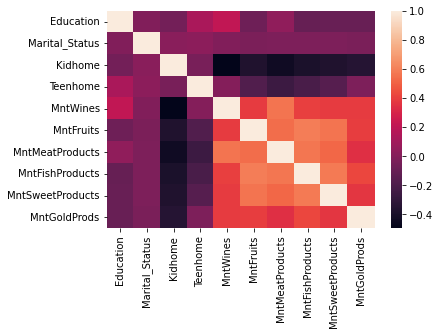

In [33]:
import seaborn as sns
sns.heatmap(df[['Education','Marital_Status','Kidhome','Teenhome']+purchase_fields].corr())

In [34]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age'],
      dtype='object')

In [36]:
where_purch_fields = [ x for x in df.columns if x.endswith('Purchases') ]
df[['Age']+where_purch_fields].corr()

,Age,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Age,1.000000,0.060846,0.145040,0.121275,0.128272
NumDealsPurchases,0.060846,1.000000,0.234185,-0.008617,0.068879
NumWebPurchases,0.145040,0.234185,1.000000,0.378376,0.502713
NumCatalogPurchases,0.121275,-0.008617,0.378376,1.000000,0.518738
NumStorePurchases,0.128272,0.068879,0.502713,0.518738,1.000000


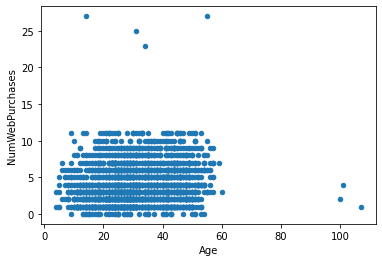

In [37]:
df.plot.scatter(x='Age',y='NumWebPurchases')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f729a6e9850>]],
      dtype=object)

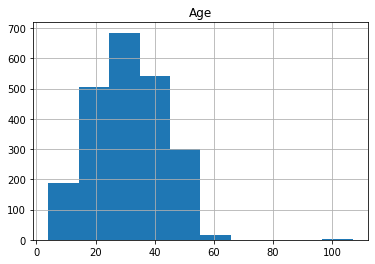

In [38]:
df.hist('Age')

In [52]:
import sklearn.decomposition

df.dropna(inplace=True)

x = sklearn.decomposition.PCA(2).fit_transform(df)

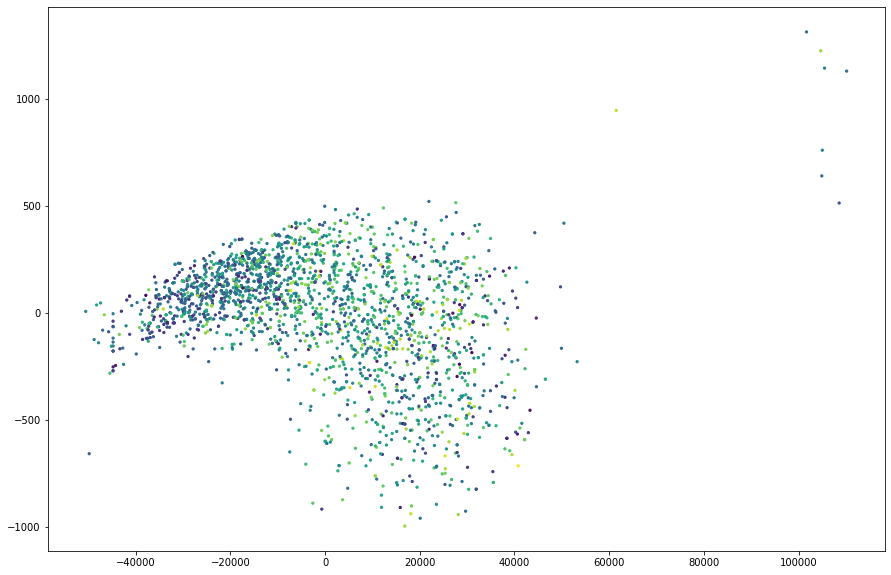

In [57]:
import matplotlib.pyplot as plt

idx = (x[:,0]<150000) & (df['Age'].values<90)
plt.figure(figsize=(15,10))
plt.scatter(x[idx,0],x[idx,1],s=5,c=df['Age'].values[idx])

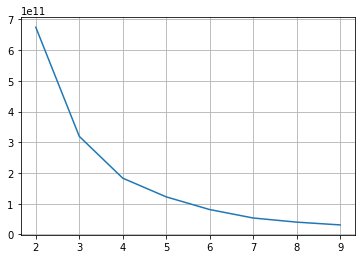

In [58]:
import sklearn.cluster

l = []
for c in range(2,10):
  model = sklearn.cluster.KMeans(c).fit(df)
  l.append(model.inertia_)

plt.plot(range(2,10),l)
plt.grid()

In [63]:
nc = 5
model = sklearn.cluster.KMeans(nc).fit(df)



(array([677.,   0., 672.,   0.,   0., 406.,   0.,   1.,   0., 460.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

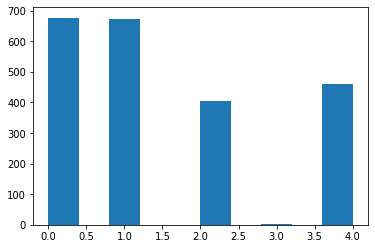

In [65]:
plt.hist(model.labels_)

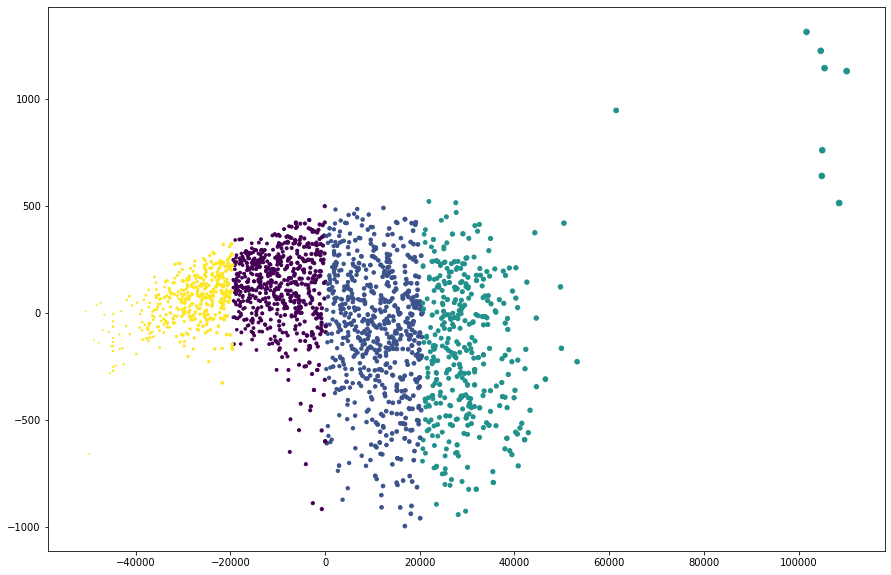

In [78]:
import matplotlib.pyplot as plt

idx = (x[:,0]<150000) & (df['Age'].values<90)
plt.figure(figsize=(15,10))
plt.scatter(x[idx,0],x[idx,1],s=df['Income'].values[idx]/5000,c=model.labels_[idx])

In [72]:
pd.DataFrame(model.cluster_centers_,columns=df.columns)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,2.598227,0.627770,42182.809453,0.672083,0.655835,505.094535,49.527326,120.537666,7.964549,46.493353,...,0.084195,0.038405,1.477105e-03,5.908419e-03,5.908419e-03,0.013294,3.0,11.0,0.119645,31.503693
1,2.604167,0.663690,62821.206845,0.200893,0.720238,525.302083,48.598214,475.211310,35.748512,205.694940,...,0.044643,0.110119,3.273810e-02,4.315476e-02,1.785714e-02,0.007440,3.0,11.0,0.113095,34.058036
2,2.546798,0.637931,82719.044335,0.071429,0.238916,487.660099,49.746305,657.241379,64.763547,468.945813,...,0.096059,0.155172,3.423645e-01,2.684729e-01,3.448276e-02,0.004926,3.0,11.0,0.315271,32.285714
3,2.000000,1.000000,666666.000000,1.000000,0.000000,668.000000,23.000000,9.000000,14.000000,18.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.0,11.0,0.000000,23.000000
4,1.969565,0.650000,23381.952174,0.780435,0.206522,523.904348,48.269565,18.017391,5.830435,21.630435,...,0.080435,0.002174,1.526557e-16,3.191891e-16,-5.724587e-17,0.010870,3.0,11.0,0.104348,25.539130
